In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = "HR_comma_sep.csv"
df  = pd.read_csv(path)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


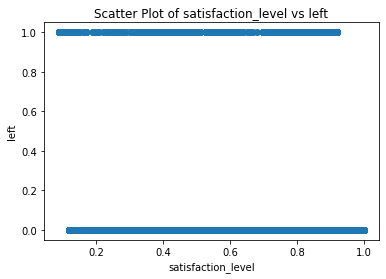

In [7]:
plt.scatter(x =df["satisfaction_level"], y = df["left"])
plt.xlabel("satisfaction_level")
plt.ylabel("left")
plt.title("Scatter Plot of satisfaction_level vs left")
plt.show()

In [9]:
X = df.drop(["Department", "salary", "left"], axis = "columns")
y = df["left"]
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)
X.head()

shape of X =  (14999, 7)
shape of y =  (14999,)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (11999, 7)
shape of y_train =  (11999,)
shape of X_test =  (3000, 7)
shape of y_test =  (3000,)


In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [12]:
lr.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_test

10995    0
1277     1
12834    0
2296     0
1926     1
        ..
12138    1
7659     0
13686    0
116      1
5121     0
Name: left, Length: 3000, dtype: int64

In [14]:
y_pred  = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1]:
df_2 = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["satisfaction_level",	"last_evaluation", "number_project"	, "average_montly_hours", "time_spend_company",	"Work_accident", "promotion_last_5years", "Actual Left", "Left Predicted"])
df_2.head()

NameError: name 'pd' is not defined

In [30]:
df_2['Actual Left'].value_counts()

0.0    2300
1.0     700
Name: Actual Left, dtype: int64

In [31]:
df_2['Left Predicted'].value_counts()

0.0    2615
1.0     385
Name: Left Predicted, dtype: int64

In [15]:
lr.score(X_test,y_test)

0.761